In [1]:
import os, sys
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.cm as cm
import anndata
import warnings
warnings.filterwarnings('ignore', category=anndata.ImplicitModificationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
sys.path.insert(
    0,
    '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/script/spatial_pipeline/lib/utils'
)
from spatial.utils import getDefaultColors, removeBiasGenes, getDEG
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
sc._settings.ScanpyConfig(figdir='./',n_jobs=30)

In [2]:
od = '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/9.9_scRNA_T_sinature_score'
os.system(f'mkdir -p {od}')
os.chdir(od)

In [3]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/yixianai/SC_reanalysis/result/3_cluster/Tcell/seurat_obj.h5ad')


In [4]:
# reorder categories of adata.obs['cellsubtype'] by character
adata.obs['cellsubtype'] = pd.Categorical(adata.obs['cellsubtype'],categories=sorted(adata.obs['cellsubtype'].cat.categories,key=lambda x: x.lower()),ordered=True)
adata.obs['cellsubtype'].value_counts()


cellsubtype
T_CD8_GZMK_NMF_7         3961
T_CD4NV_CM_rest_NMF_8    2601
T_CD4_unknown_NMF_12     2445
T_CD8_KLRC1_NMF12        2346
T_CD4_IL2RA_NMF_10       2074
T_CD4_unknown_NMF_9      1965
T_CD8_CXCL13_NMF_17      1675
NK_NMF_5                 1543
T_HSPA1A_NMF_19          1528
T_CD8_PRSS1_NMF_20       1402
NK_PRSS1_NMF_15           979
T_cycling_NMF_3           415
Name: count, dtype: int64

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


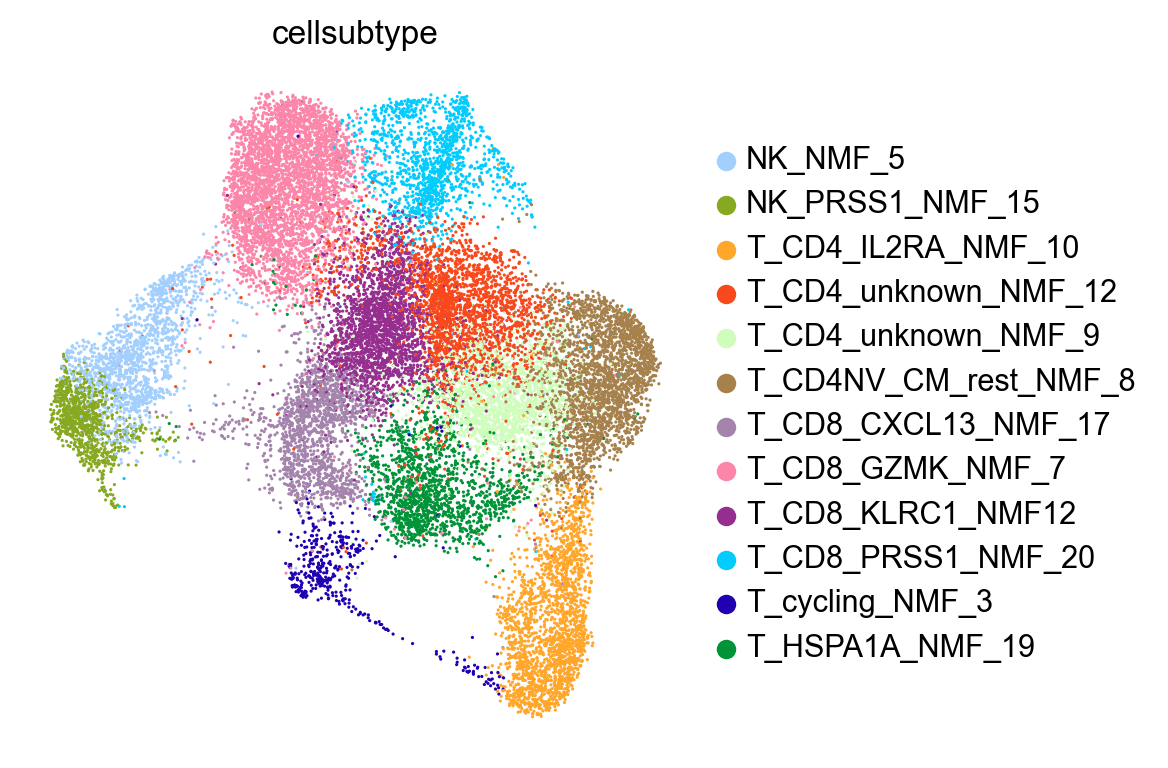

In [38]:
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=False,figsize=(6,4))
colors = getDefaultColors(adata.obs['cellsubtype'].unique().shape[0],type=9)
sc.pl.umap(adata, color='cellsubtype',palette=colors,save='T_cell_subtype_umap.pdf')

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


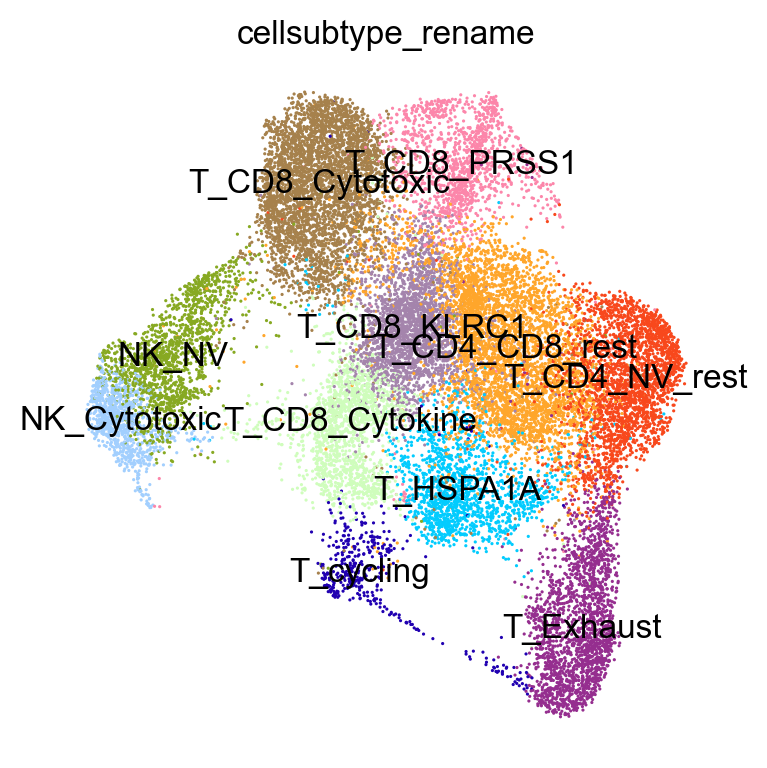

In [9]:
# rename_dict = {
#     'T_CD8_GZMK_NMF_7': 'T_CD8_Cytotoxic',
#     'T_CD4NV_CM_rest_NMF_8': 'T_CD4_NV_rest',
#     'T_CD4_unknown_NMF_12': 'T_CD4_CD8_rest',
#     'T_CD8_KLRC1_NMF12': 'T_CD8_KLRC1',
#     'T_CD4_IL2RA_NMF_10': 'T_Exhaust',
#     'T_CD4_unknown_NMF_9': 'T_CD4_CD8_rest',
#     'T_CD8_CXCL13_NMF_17': 'T_CD8_Cytokine',
#     'NK_NMF_5': 'NK_NV',
#     'T_HSPA1A_NMF_19': 'T_HSPA1A',
#     'T_CD8_PRSS1_NMF_20': 'T_CD8_PRSS1',
#     'NK_PRSS1_NMF_15': 'NK_Cytotoxic',
#     'T_cycling_NMF_3': 'T_cycling'
# }
# adata.obs['cellsubtype_rename'] = adata.obs['cellsubtype'].map(rename_dict)
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=False,figsize=(4,4))
colors = getDefaultColors(adata.obs['cellsubtype_rename'].unique().shape[0],type=9)
sc.pl.umap(adata, color='cellsubtype_rename',palette=colors,save='T_cell_cellsubtype_rename_umap.pdf',legend_loc='on data')


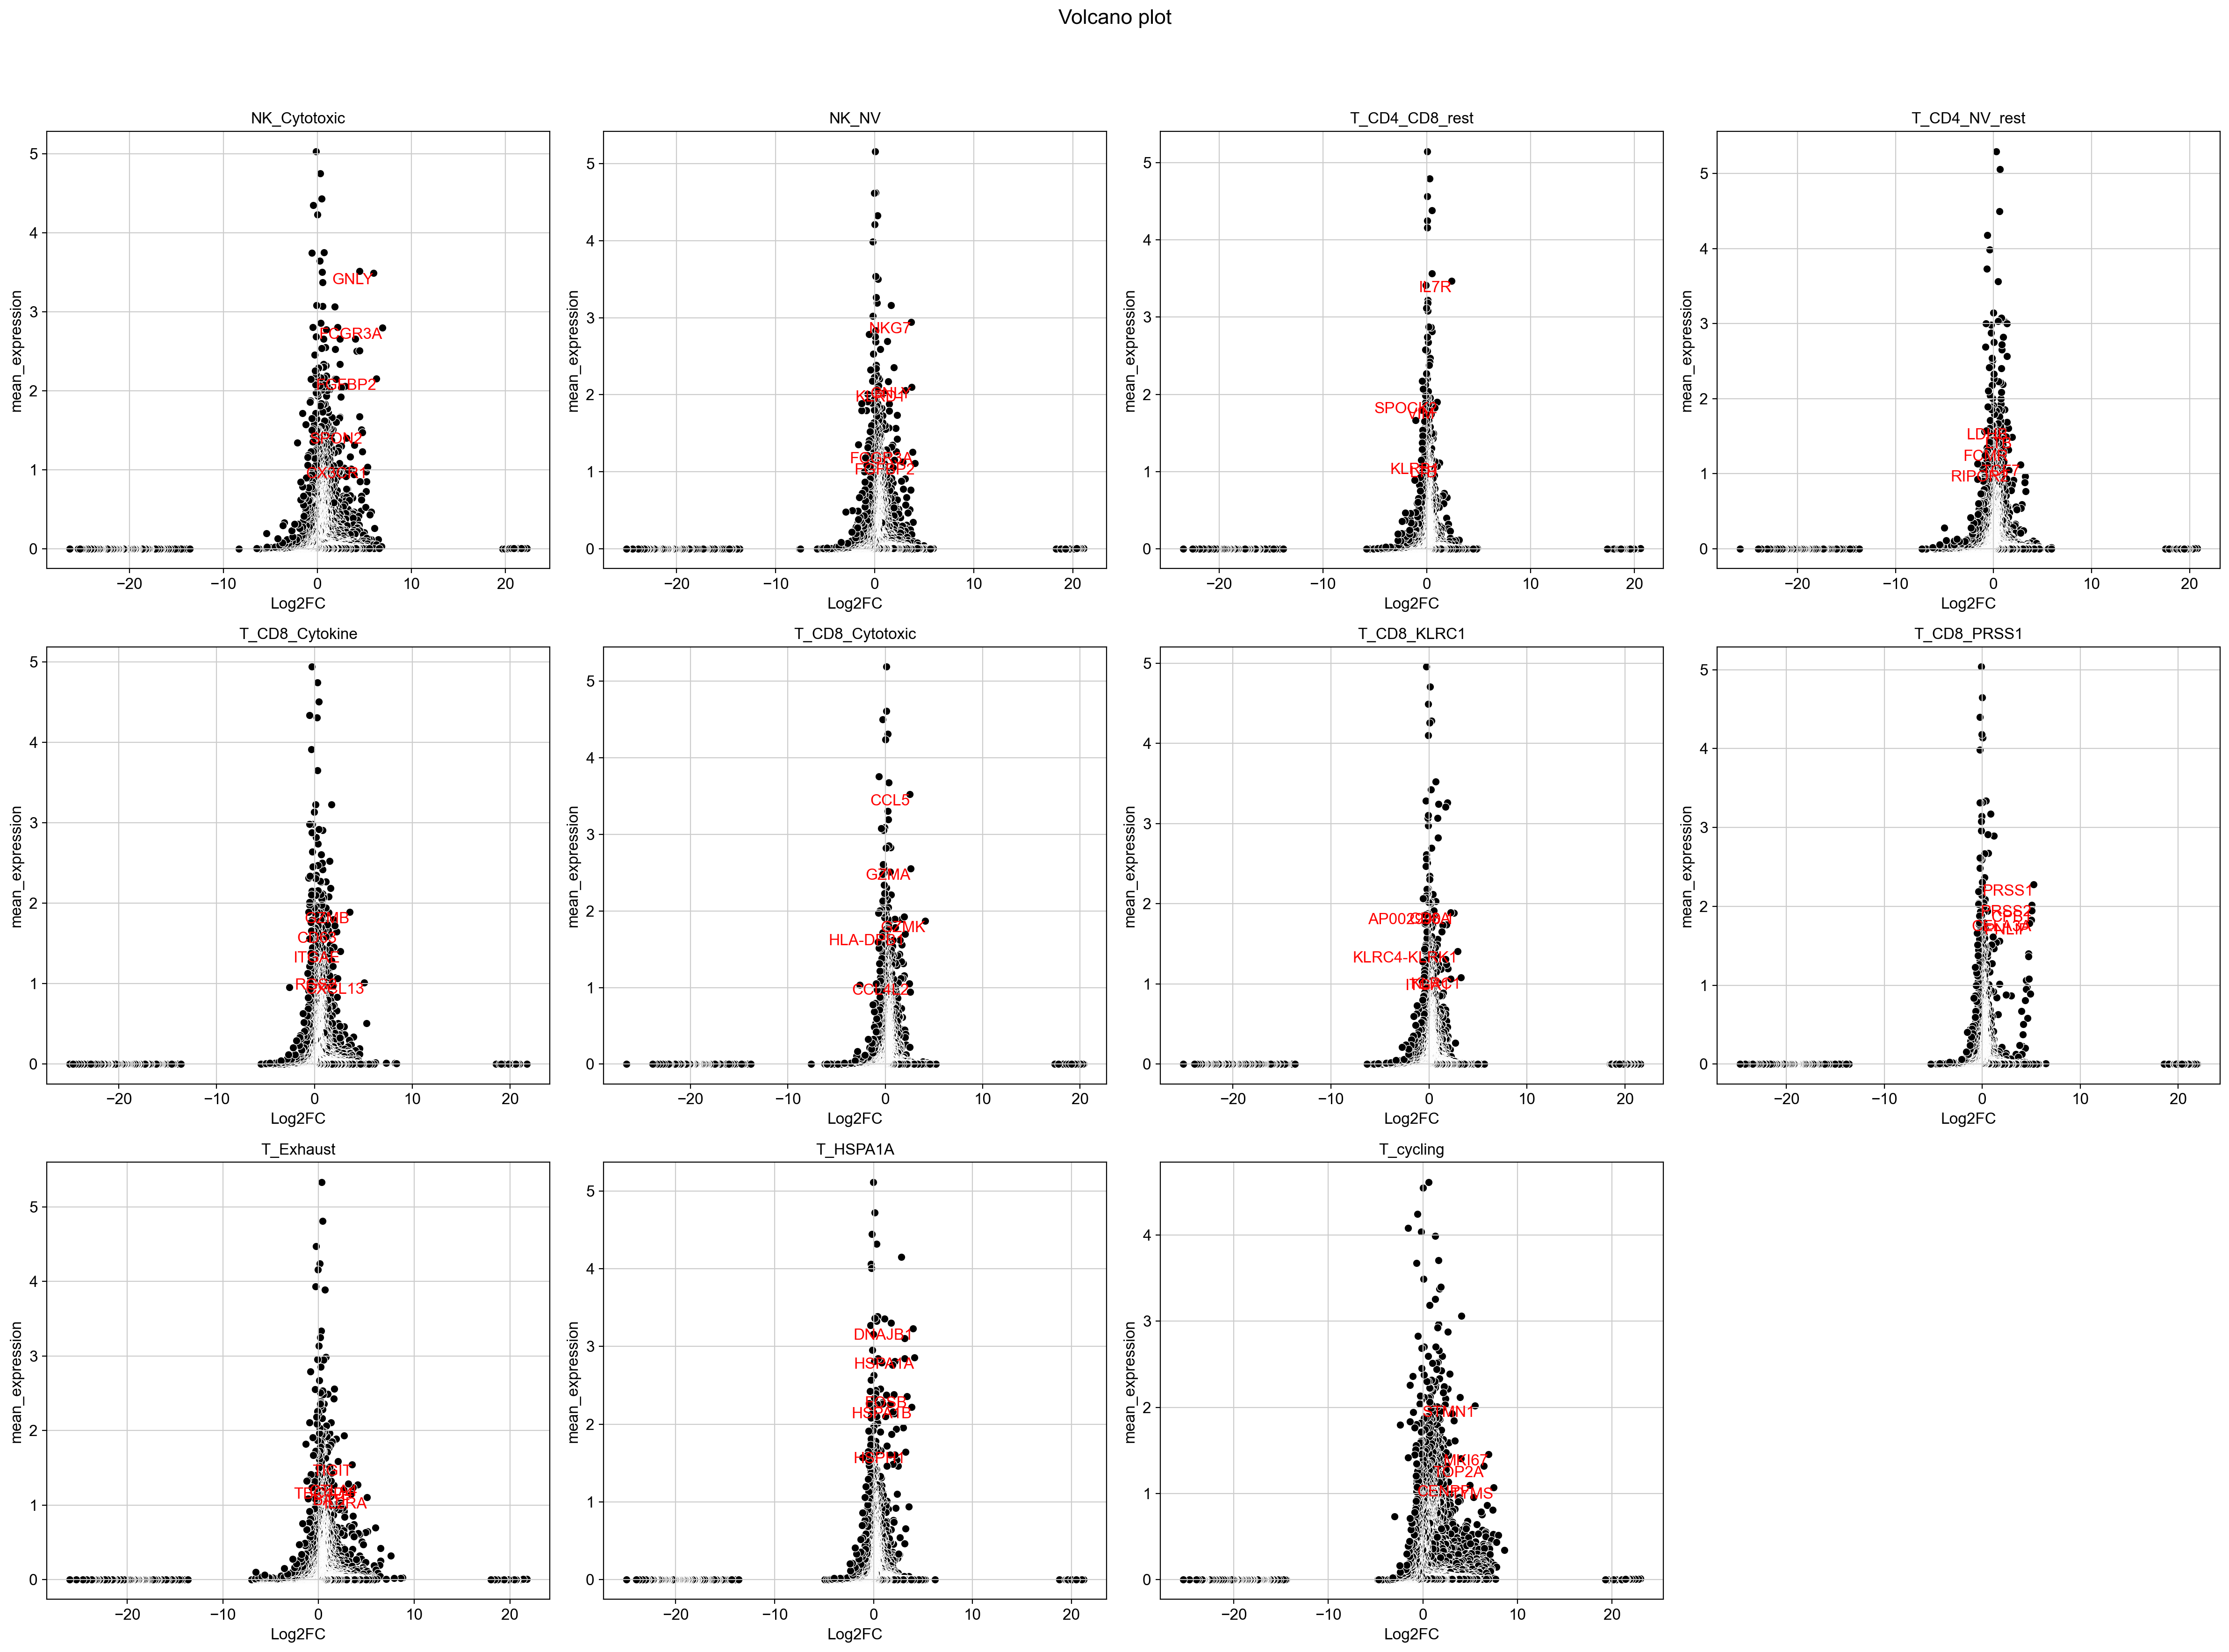

In [6]:
sc.tl.rank_genes_groups(adata,
                        'cellsubtype_rename',
                        method='wilcoxon',
                        use_raw=False,
                        # layer='norm',
                        key_added='rank_genes_groups')
DEG_dict = getDEG(adata,
                    'cellsubtype_rename',
                    qval_cutoff=0.05,
                    mean_expr_cutoff=1,
                #   layer='norm',
                    top_genes=3,
                    save=f'DEG_volcano.png')

In [10]:
sc.pl.dotplot(adata, DEG_dict, groupby='cellsubtype_rename',cmap='viridis_r',save='scRNA_DEG_dotplot_macrophage.pdf',figsize=(10,3))

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


In [30]:
adata.obs['cellsubtype_rename'].value_counts()

T_CD4_CD8_rest     4410
T_CD8_Cytotoxic    3961
T_CD4_NV_rest      2601
T_CD8_KLRC1        2346
T_Exhaust          2074
T_CD8_Cytokine     1675
NK_NV              1543
T_HSPA1A           1528
T_CD8_PRSS1        1402
NK_Cytotoxic        979
T_cycling           415
Name: cellsubtype_rename, dtype: int64

In [27]:
from ctxcore.genesig import GeneSignature

sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/signature.gmt')
T_signature_list = ['CIBERSORT.T.cells.CD8','CIBERSORT.T.cells.CD4.naive','CIBERSORT.T.cells.CD4.memory.resting','CIBERSORT.T.cells.CD4.memory.activated','CIBERSORT.T.cells.follicular.helper','CIBERSORT.T.cells.regulatory..Tregs.','CIBERSORT.T.cells.gamma.delta','Bernard_Cytotoxic.T','Chen_ExhaustT','Chen_NaiveT','Chen_EffectorT','Chen_RegT','NKCytotoxic','T_CD4_NV_CM_rest','T_CD4_CD8_rest','T_IFN_Response','T_Proliferation','T_CD8_Cytotoxic','T_CD8_Cytokine']
sig_T = []
for i in sig:
    if i.name in T_signature_list:
        sig_T.append(i)
from pyscenic.aucell import aucell
exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
auc_mtx = aucell(exp_mtx, sig_T, noweights=True, num_workers=20)
all_zero_columns = auc_mtx.columns[auc_mtx.eq(0).all()]
adata.obs[auc_mtx.columns] = auc_mtx.fillna(0)
auc_mtx_filtered = auc_mtx.drop(columns=all_zero_columns, inplace=False)
adata.obs[auc_mtx_filtered.columns] = auc_mtx_filtered.fillna(0)
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
sc.pl.umap(adata, color=auc_mtx.columns, wspace=0.4, show=False, save="_sc_macro_score1.pdf",ncols=4)

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


[<AxesSubplot: title={'center': 'CIBERSORT.T.cells.CD8'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.T.cells.CD4.naive'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.T.cells.CD4.memory.resting'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.T.cells.CD4.memory.activated'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.T.cells.follicular.helper'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.T.cells.regulatory..Tregs.'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.T.cells.gamma.delta'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Bernard_Cytotoxic.T'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Chen_ExhaustT'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Chen_NaiveT'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Ch

In [7]:
auc_mtx.columns

Index(['Moffitt.Basal.25', 'Moffitt.Classical.25', 'Moffitt.Normal.25',
       'Moffitt.Activated.25', 'Collisson.Classical', 'Collisson.Exocrine',
       'Collisson.QM', 'ICGC.ADEX.Up', 'ICGC.ADEX.Down', 'ICGC.Immunogenic.Up',
       ...
       'TCR', 'Notch.Signaling', 'proteosome', 'TSLPSig', 'endothelin',
       'insulinSig', 'EGFRSig', 'IL23Sig', 'IL18Sig', 'IL20Sig'],
      dtype='object', name='Regulon', length=300)

In [30]:
sc.pl.umap(adata,color=["CD163", "SLC11A1", "APOC1", "CD86", "CSF1R"])

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


In [15]:
ICPs = ['IDO1','LAG3','CTLA4','TNFRSF9','ICOS','CD80','PDCD1LG2','TIGIT','CD70','TNFSF9','ICOSLG','KIR3DL1','CD86','PDCD1','LAIR1','TNFRSF8','TNFSF15','TNFRSF14','IDO2','CD276','CD40','TNFRSF4','TNFSF14','HHLA2','CD244','CD274','HAVCR2','CD27','BTLA','LGALS9','TMIGD2','CD28','CD48','TNFRSF25','CD40LG','ADORA2A','VTCN1','CD160','CD44','TNFSF18','TNFRSF18','BTNL2','CD200R1','TNFSF4','CD200','NRP1']

# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
sc.pl.stacked_violin(adata, ICPs, groupby='cellsubtype_rename', standard_scale='var', save=f'ICPs_region.pdf', cmap='viridis_r',show=False, use_raw=False, swap_axes=True)


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


{'mainplot_ax': <AxesSubplot: >,
 'color_legend_ax': <AxesSubplot: title={'center': 'Median expression\nin group'}>}

In [4]:
sample = 'SS200000495BR_C5'

In [36]:
adata = sc.read(f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.1_cellbin_rawdata/rawdata/adata_P14_PT.h5ad')


In [37]:
adata.X

<227156x36788 sparse matrix of type '<class 'numpy.float64'>'
	with 32233637 stored elements in Compressed Sparse Row format>

In [32]:
wnt_genes = ['ABL1','ANKRD6','ARHGEF19','CCDC88C','CDC42','CELSR1','CELSR2','CELSR3','CSNK1D','CSNK1E','CTHRC1','DAAM1','DAAM2','DAB2','DACT1','DKK1','DVL1','DVL2','DVL3','FRZB','FZD1','FZD10','FZD2','FZD3','FZD4','FZD5','FZD6','FZD7','FZD8','FZD9','GPC3','GPC4','GPC6','GRHL3','IFT80','LBX2','MAGI2','MED12','MKS1','MLLT3','MYOC','NKD1','NLK','NPHP3','PLEKHA4','PRICKLE1','PRICKLE2','PTK7','RAC1','RHOA','RNF213','ROR1','ROR2','RSPO3','RYK','SFRP1','SFRP2','SFRP4','SFRP5','SMURF1','SMURF2','SPEF1','TIAM1','TMEM67','VANGL1','VANGL2','WNT11','WNT4','WNT5A','WNT5B','WNT7A','WNT9B','ZNRF3']

In [43]:
# wnt_genes = list(sig_T[0].gene2weight.keys())
sc.tl.score_genes(adata,gene_list=wnt_genes,ctrl_size=50,use_raw=False,score_name='WNT_score')

In [44]:
# from ctxcore.genesig import GeneSignature

# sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/signature.gmt')
# signature_list = ['WNT.Signaling']
# sig_T = []
# for i in sig:
#     if i.name in signature_list:
#         sig_T.append(i)
# from pyscenic.aucell import aucell
# exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
# auc_mtx = aucell(exp_mtx, sig_T, noweights=True, num_workers=20)
# all_zero_columns = auc_mtx.columns[auc_mtx.eq(0).all()]
# adata.obs[auc_mtx.columns] = auc_mtx.fillna(0)
# auc_mtx_filtered = auc_mtx.drop(columns=all_zero_columns, inplace=False)
# adata.obs[auc_mtx_filtered.columns] = auc_mtx_filtered.fillna(0)
# sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
# adata.obsm['spatial'] = adata.obs[['x','y']].values
sc.pl.spatial(adata, img_key="hires", color='WNT_score',spot_size = 30,save="_ncWNT_score.pdf")

meta NOT subset; don't know how to subset; dropped


In [25]:
adata.obs[auc_mtx.columns].max()

WNT.Signaling    0.090059
dtype: float64